In [0]:
import pandas as pd #import pandas
import numpy as numpy #import numpy
from sklearn.utils import shuffle # to shuffle the data 
import random # import random
import sklearn # import sklearn
import nltk # import nltk
from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
import matplotlib
import matplotlib.pyplot as plt #import matplotlib.pyplot 


from sklearn.feature_extraction.text import TfidfVectorizer #  import TF-idf vectorizer

#tweets1 = df.iloc[0:9999,]
#tweets1.to_csv('tweets1.csv', sep=',')
%matplotlib inline



In [0]:
df=pd.read_csv('sentiment.tsv', sep='\t',header=None)
col=['Sentiment','Tweet']
df.columns=['Sentiment','Tweet']
df.head()

,Sentiment,Tweet
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [0]:
df.Sentiment.value_counts()

pos    1016
neg     985
Name: Sentiment, dtype: int64

In [0]:
df['pre_clean_len'] = [len(t) for t in df.Tweet]
df.head()

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,cant believe it it really doesnt belong there ...
1,pos,having a vodka tonic and looking forward to go...,112,having vodka tonic and looking forward to goin...
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,could you follow me please would really apprec...
3,pos,@jordanknight for once.................. PLEAS...,94,for once please tell us why were thinking of t...
4,neg,Had a dream about a walk in fast food resturau...,118,had dream about walk in fast food resturaunt t...


In [0]:
df[df.pre_clean_len > 140].head(10)    ## check for any tweets greater than 140 characters

,Sentiment,Tweet,pre_clean_len,clean
110,pos,On train with at least two gaggles of teenager...,142,on train with at least two gaggles of teenager...
163,pos,@mariahglare: you are a wonderful combination ...,142,you are wonderful combination of hilarious cre...
210,neg,No Ask Erin Live today Tweeps... I'm sick and ...,148,no ask erin live today tweeps sick and doing q...
227,pos,Rewritten #TI Dlog Module from #ASM to #C and ...,147,rewritten ti dlog module from asm to and imple...
255,neg,Must quit working pos 2night. Need rest. Going...,148,must quit working pos night need rest going wa...
256,neg,Chips &amp; guac at Club de Capitanes. Wasting...,151,chips guac at club de capitanes wasting time b...
298,neg,"@jessomine Sorry! These are PDFs, folks - ap...",144,sorry these are pdfs folks apologies for not s...
498,pos,&quot;Why can't you see.. You belong with me.....,144,why can not you see you belong with me taylor ...
505,neg,On to Xbox Live upgrades. Last FM integration....,151,on to xbox live upgrades last fm integration g...
543,neg,IVE HAD THE MOST HORRIBLE DAY. i dont try to b...,141,ive had the most horrible day dont try to be n...


In [0]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets
pat2 = r'https?://[^ ]+'        # remove URL's from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URL's from tweets
negations_dic = {"isnt":"is not", "arent":"are not", "wasnt":"was not", "werent":"were not",   # converting words like isn't to is not
                "havent":"have not","hasnt":"has not","hadnt":"had not","wont":"will not",
                "wouldnt":"would not", "dont":"do not", "doesnt":"does not","didnt":"did not",
                "cant":"can not","couldnt":"could not","shouldnt":"should not","mightnt":"might not",
                "mustnt":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [0]:
df['clean']=df['Tweet'].apply(tweet_cleaner)

In [0]:
df.head()

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,can not believe it it really does not belong t...
1,pos,having a vodka tonic and looking forward to go...,112,having vodka tonic and looking forward to goin...
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,could you follow me please would really apprec...
3,pos,@jordanknight for once.................. PLEAS...,94,for once please tell us why were thinking of t...
4,neg,Had a dream about a walk in fast food resturau...,118,had dream about walk in fast food resturaunt t...


In [0]:
df['clean'] = df['clean'].apply(lambda x: x.split())
df.head()

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,"[can, not, believe, it, it, really, does, not,..."
1,pos,having a vodka tonic and looking forward to go...,112,"[having, vodka, tonic, and, looking, forward, ..."
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,"[could, you, follow, me, please, would, really..."
3,pos,@jordanknight for once.................. PLEAS...,94,"[for, once, please, tell, us, why, were, think..."
4,neg,Had a dream about a walk in fast food resturau...,118,"[had, dream, about, walk, in, fast, food, rest..."


In [0]:
'''
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


df['clean'] = df['clean'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

'''

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords              # remove stops words
stop = stopwords.words("english")

df['clean']=df['clean'].apply(lambda x: [item for item in x if item not in stop])

df[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,"[believe, really, belong, hope, ruin, im, bad,..."
1,pos,having a vodka tonic and looking forward to go...,112,"[vodka, tonic, looking, forward, going, saddle..."
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,"[could, follow, please, would, really, appreci..."
3,pos,@jordanknight for once.................. PLEAS...,94,"[please, tell, us, thinking, person]"
4,neg,Had a dream about a walk in fast food resturau...,118,"[dream, walk, fast, food, resturaunt, sold, ic..."


In [0]:
from nltk.stem import WordNetLemmatizer      # perform lemmatization
  
lemmatizer = WordNetLemmatizer() 

def lamm(row):
  my_list=row['clean']
  lamm=[lemmatizer.lemmatize(word)  for word in my_list]
  return  lamm
  
df['clean'] = df. apply (lamm, axis=1) 
   
df.head()

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,"[believe, really, belong, hope, ruin, im, bad,..."
1,pos,having a vodka tonic and looking forward to go...,112,"[vodka, tonic, looking, forward, going, saddle..."
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,"[could, follow, please, would, really, appreci..."
3,pos,@jordanknight for once.................. PLEAS...,94,"[please, tell, u, thinking, person]"
4,neg,Had a dream about a walk in fast food resturau...,118,"[dream, walk, fast, food, resturaunt, sold, ic..."


In [0]:

# import these modules 
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def st(row):
  my_list=row['clean']
  lamm=[ps.stem(word)  for word in my_list]
  return  lamm

df['clean']=df. apply (st, axis=1)
df[:5]
  

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,"[believ, realli, belong, hope, ruin, im, bad, ..."
1,pos,having a vodka tonic and looking forward to go...,112,"[vodka, tonic, look, forward, go, saddl, ranch..."
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,"[could, follow, pleas, would, realli, appreci]"
3,pos,@jordanknight for once.................. PLEAS...,94,"[pleas, tell, u, think, person]"
4,neg,Had a dream about a walk in fast food resturau...,118,"[dream, walk, fast, food, resturaunt, sold, ic..."


In [0]:
def rejoin_words(row):
    my_list = row['clean']
    joined_words = ( " ".join(my_list))
    return joined_words

df['clean'] = df.apply(rejoin_words, axis=1)
df[:5]

,Sentiment,Tweet,pre_clean_len,clean
0,neg,"@jamielewislewis i cant believe it, it really ...",138,believ realli belong hope ruin im bad thank ho...
1,pos,having a vodka tonic and looking forward to go...,112,vodka tonic look forward go saddl ranch westga...
2,pos,@ddlovatofans1neg1 Could you follow me please....,76,could follow pleas would realli appreci
3,pos,@jordanknight for once.................. PLEAS...,94,pleas tell u think person
4,neg,Had a dream about a walk in fast food resturau...,118,dream walk fast food resturaunt sold ice cream...


In [0]:
clean_df=df[['clean','Sentiment']].copy()

clean_df= clean_df.rename(columns={'clean': 'text', 'Sentiment': 'target'})
clean_df.head()

,text,target
0,believ realli belong hope ruin im bad thank ho...,neg
1,vodka tonic look forward go saddl ranch westga...,pos
2,could follow pleas would realli appreci,pos
3,pleas tell u think person,pos
4,dream walk fast food resturaunt sold ice cream...,neg


In [0]:



clean_df.head()

replace_values={'pos' : 1, 'neg':0 } 

clean_df=clean_df.replace({"target": replace_values})

In [0]:
clean_df['clean_len'] = [len(t) for t in clean_df.text]

In [0]:
clean_df[clean_df.clean_len > 140].head(10)

clean_df.target.value_counts()

1    1016
0     985
Name: target, dtype: int64

In [0]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(2001,)
(2001,)


In [0]:
from sklearn.model_selection import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state= 42)

In [0]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))

In [0]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets

In [0]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [0]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [0]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [0]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.6401366120218579

In [0]:
y_pred_nb = nb.predict(X_test_dtm)

In [0]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.675231977159172

In [0]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[401, 287],
       [168, 545]])

# Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6604709641567102

In [0]:
y_pred_lg = logisticRegr.predict(X_test_dtm)  # predict the sentiments of testing data tweets

from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.6823697359029265

AUC: 0.737


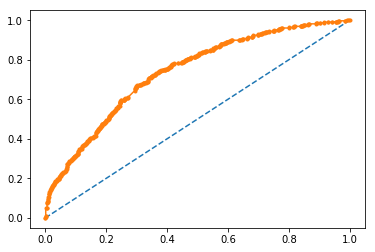

In [0]:
# Training Set
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probs = logisticRegr.predict_proba(X_test_dtm)

probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()